> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Patients NoShow Appointments Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### we are going to invistage No-show appointments dataset consist of 100k rows to see what maybe cause not show up the appointment

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.




● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.


● ‘Neighborhood’ indicates the
location of the hospital.


● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare program Bolsa Família.

## we are going to solve many Questions like this

#### Question 1(does the age affect on attendance rate)
#### Question 2(Does age and chronic gender influencing in the attendance rate!)


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

we will need to read the data from kaggle dataset and do a proper assess and cleaning our data set to make it ready to get insights about what we need without affect the result


### General Properties
##### we will read the CSV file by read_csv pandas function

In [2]:

df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


# Assess

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#exploring the shape of the dataframe
df.shape

(110527, 14)

 #### Data contains 110527 appointments(rows)and 14 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### there is no missing data to handle it

In [6]:
df.duplicated().sum()

0

##### ther is no dublicated rows in the dataset

In [7]:
#check the number of unique patients
df['PatientId'].nunique()

62299

In [8]:
#check for the duplicated patient
df['PatientId'].duplicated().sum()

48228

##### there is 48228 duplicated patientID

In [9]:
#check the number of duplicated patient id and noshow
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 patients id have the same status of showing or no we will remove them

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there is no missing data

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37 , min age is 1 and max age 115 ... there is 50% fo ages is about 37 year , 25% of ages is about 18 year
and 75% of ages is about 55 year 


### Data Cleaning
i will rename columns hipertension and No-show columns to be Hypertension and No_show 
 

In [12]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_Show'},          inplace=True) 
df.head()
                   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#removing duplicated id with duplicated showing status leaving the duplicated id if they differ in the showing status
#as the same patients may have several appointments attend some and absent from other
df.drop_duplicates(['PatientId','No_Show'], inplace=True)
df.shape

(71817, 14)

In [14]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1 , inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling Summery

after gathering the data from the csv file we explored the first few rows of the data set to it's general properities
then we show the dimensions of our data then we checked if any duplicated appointments,, and if there is any duplicated patientID and then remove them we see sum statistical analysis using describe method in panadas library ,,we then clean our data by renaming some columns and dropping unncessary information

<a id='eda'></a>
## Exploratory Data Analysis

after we cleaned the data we go to do some statisticals and create some visualization to our dataset





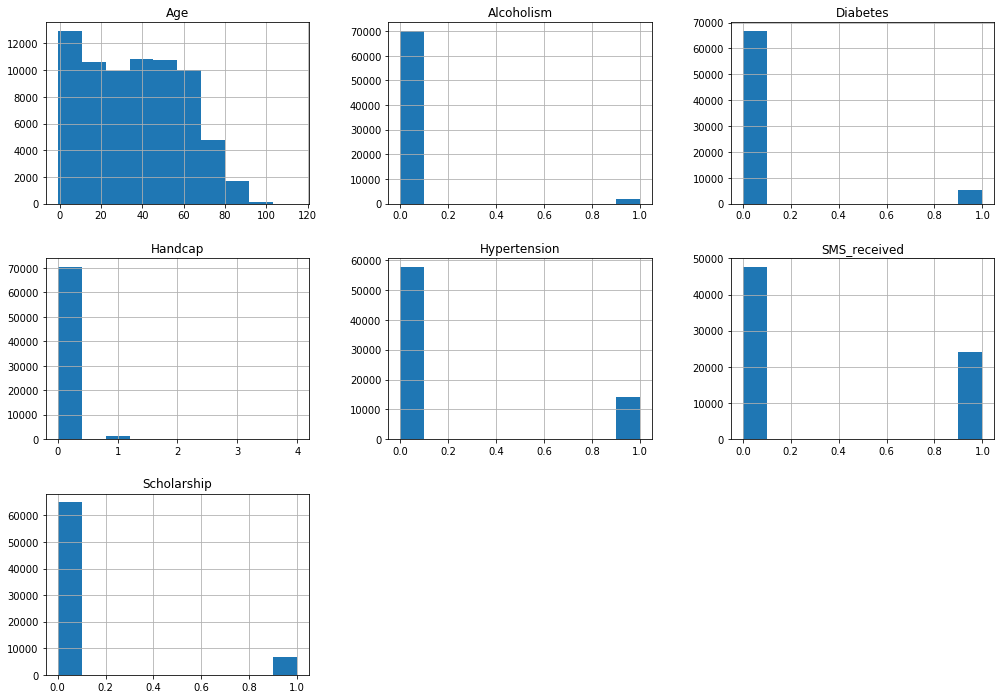

In [15]:
df.hist(figsize=(17,12));


In [16]:
show=df.No_Show=='No'
noshow=df.No_Show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54154
 Age              54154
 Neighbourhood    54154
 Scholarship      54154
 Hypertension     54154
 Diabetes         54154
 Alcoholism       54154
 Handcap          54154
 SMS_received     54154
 No_Show          54154
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_Show          17663
 dtype: int64)

Number of showed patients is 54154 is 3 times greater than the number of noshow patients 17663

In [17]:
df[show].mean() , df[noshow].mean()

(Age             37.228460
 Scholarship      0.091332
 Hypertension     0.202940
 Diabetes         0.072866
 Alcoholism       0.023599
 Handcap          0.020903
 SMS_received     0.297226
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

the average age of showed patients is 37 years and the average age of no showed patients is 34 years
there is many difrent data between two status show and noshow

### Research Question 1 (does the age affect on attendance rate!)

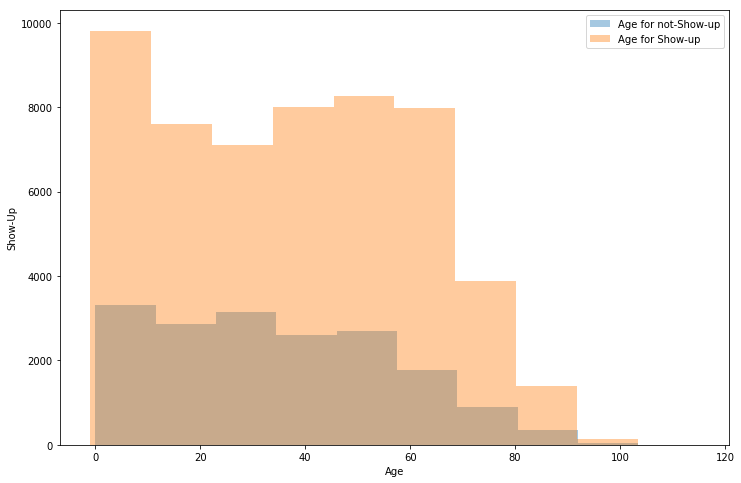

In [20]:
#does the age affect on attendance
df[noshow]["Age"].plot(figsize=(12,8),alpha= 0.4 , kind="hist" , label="Age for not-Show-up") 
df[show]["Age"].plot(figsize=(12,8),alpha = .4 , kind="hist" , label="Age for Show-up")

plt.legend()
plt.xlabel("Age");
plt.ylabel("Show-Up");

this histograme show that paients from 0 to 9 years most attended and patients from 45 to 56 are most attended too with comparision between other ages .. and the patients with higher ages are lowe in attendence

Text(0,0.5,'Mean Ages')

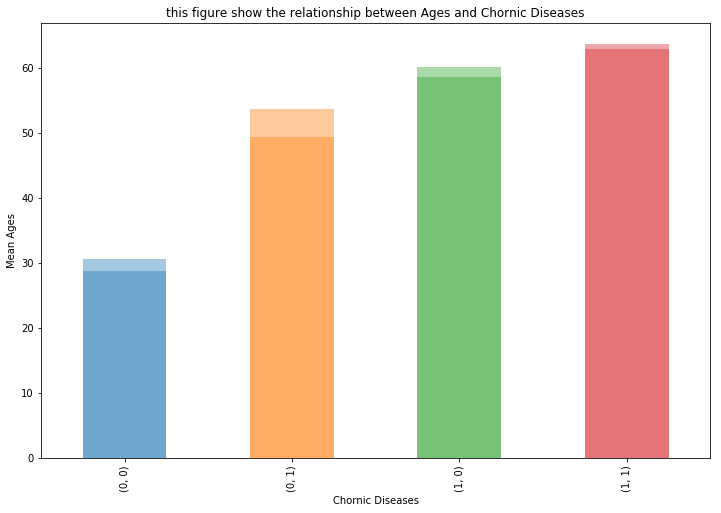

In [22]:
#relationship between Ages and Chornic Diseases
plt.figure(igsize=[15,5])
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(figsize=(12,8),alpha= 0.4 , kind="bar" , label="not-Show-up") 
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(figsize=(12,8),alpha= 0.4 , kind="bar" , label="Show-up") 
plt.title("this figure show the relationship between Ages and Chornic Diseases")
plt.xlabel('Chornic Diseases')
plt.ylabel('Mean Ages')

In [57]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'] ,df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.712613
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

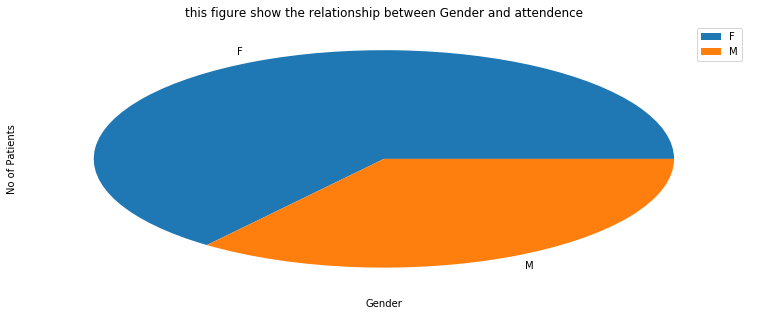

In [64]:
#the types of gender that attended
def attendance_age(df,col,attended,absent):
    plt.figure(figsize=[13,5])
    df[col][show].value_counts(normalize=True).plot(kind='pie' ,label='show')
    #df[col][noshow].hist(alpha=0.5 , bins=10 ,color='green' ,label='noshow')
    plt.legend()
    plt.title("this figure show the relationship between Gender and attendence")
    plt.xlabel('Gender')
    plt.ylabel('No of Patients')
attendance_age(df,'Gender',show,noshow)

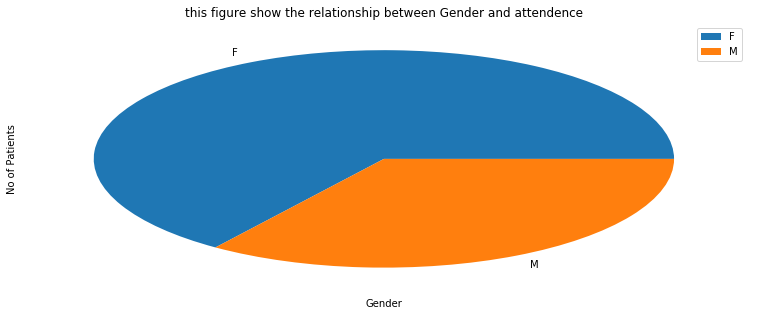

In [65]:
def attendance_age(df,col,attended,absent):
    plt.figure(figsize=[13,5])
    df[col][noshow].value_counts(normalize=True).plot(kind='pie' ,label='show')
    plt.legend()
    plt.title("this figure show the relationship between Gender and attendence")
    plt.xlabel('Gender')
    plt.ylabel('No of Patients')
attendance_age(df,'Gender',show,noshow)

Gender has no clear effect on attendance

### Research Question 2(Does age and chronic gender influencing in the attendance rate!)

Text(0,0.5,'Mean Ages')

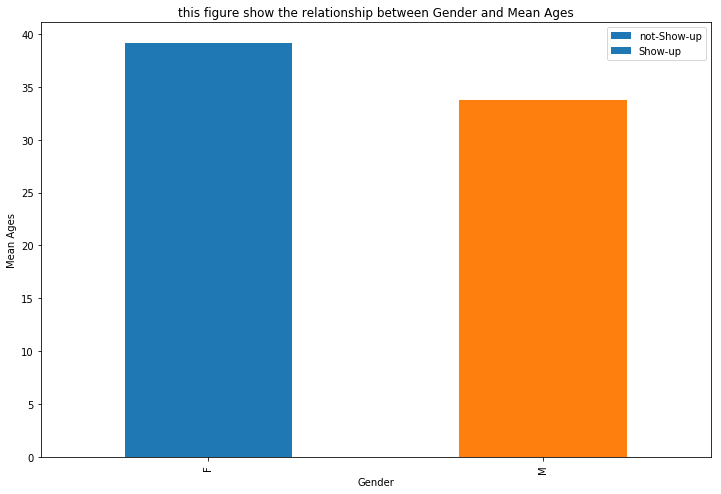

In [38]:
#does age and chronic gender affect the attendance
plt.figure(figsize=[15,5])
df[noshow].groupby(['Gender']).mean()['Age'].plot(figsize=(12,8), kind="bar" ,label="not-Show-up") 
df[show].groupby(['Gender']).mean()['Age'].plot(figsize=(12,8), kind="bar" ,label="Show-up") 
plt.legend()
plt.title("this figure show the relationship between Gender and Mean Ages")
plt.xlabel('Gender')
plt.ylabel('Mean Ages')

there is no correlaion between gender and age in attendance

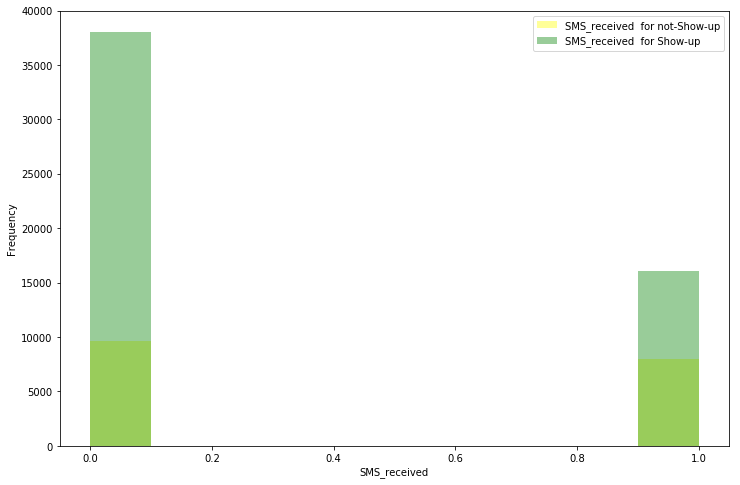

In [40]:
#does reciving SMS affecting on attendance
df[noshow]["SMS_received"].plot(figsize=(12,8),alpha= 0.4 , kind="hist" ,color="yellow", label="SMS_received  for not-Show-up") 
df[show]["SMS_received"].plot(figsize=(12,8),alpha = .4 , kind="hist" ,color="green", label="SMS_received  for Show-up")

plt.legend()
plt.xlabel("SMS_received");
#plt.ylabel("Show-Up");

this means the number of attendance that aren't received an SMS message are greater than the number of attendance that are received SMS message

Text(0,0.5,'No of Patients')

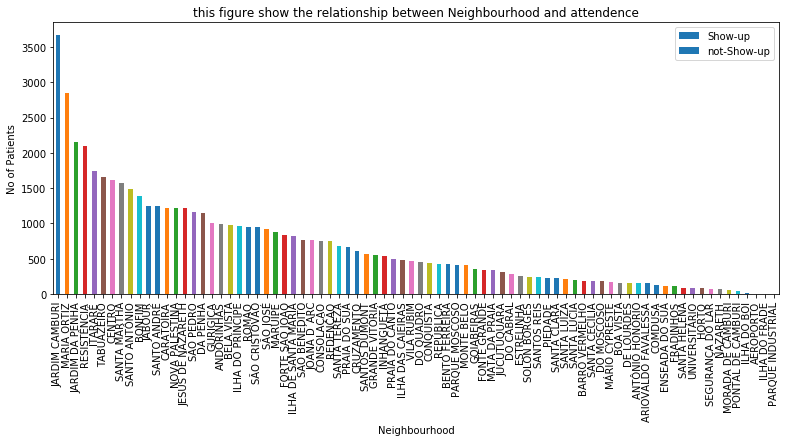

In [44]:
    #does the Neighbourhood affect the attendance
    plt.figure(figsize=[13,5])
    df.Neighbourhood[noshow].value_counts().plot( kind="bar" , label="Show-up")
    df.Neighbourhood[show].value_counts().plot( kind="bar" , label="not-Show-up")
    plt.legend()
    plt.title("this figure show the relationship between Neighbourhood and attendence")
    plt.xlabel('Neighbourhood')
    plt.ylabel('No of Patients')

there is a relationship between the Neighbourhood and attendence from this figure

<a id='conclusions'></a>
## Conclusions
Neighbourhood has a greatest effecton attendence , JARDIM CAMBURI has the greatest number of patients
and also has the greatest number of showing rate


number of showing patients from specific Neighbourhood afeected by receiving SMS and ages


age has a clear influence on the showing rate .. ages from 0:9 are the most showing patients 
taking care of the kids .. then from 45:55 are the least attendance  whome above 65 years old


Number of showing patients without receiving SMS is greater than showing patients with receiving SMS
which means that we need to revisit our SMS campagin


# Limitation

ther is no correlation between showing and gender ,chronic diseases ,enrollment in the welfare program

i want to test if there is relationshib between the distance from the patient to the doctor and the show up but this data doesn't available

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])